# Importaciones necesarias

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.cbook as cbook
import matplotlib.image as image
import fastf1.plotting

In [26]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

In [27]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [28]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
#piloto1 = input('Piloto 1: ')
#piloto2 = input('Piloto 2: ')

Año: 2022
Round: 18
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R


# Carga de la sesión

In [29]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '31', '44', '5', '14', '63', '6', '4', '3', '18', '22', '20', '77', '24', '10', '47', '55', '23']


# Listado de pilotos

In [30]:
drivers = pd.unique(session.laps['Driver'])
drivers
# seleccionar un solo piloto drivers[0] - SAI

array(['VER', 'PER', 'LEC', 'OCO', 'HAM', 'VET', 'ALO', 'RUS', 'LAT',
       'NOR', 'RIC', 'STR', 'TSU', 'MAG', 'BOT', 'ZHO', 'GAS', 'MSC',
       'SAI', 'ALB'], dtype=object)

# Listado de Equipos

In [31]:
teams = pd.unique(session.laps['Team'])
teams

array(['Red Bull Racing', 'Ferrari', 'Alpine', 'Mercedes', 'Aston Martin',
       'Williams', 'McLaren', 'AlphaTauri', 'Haas F1 Team', 'Alfa Romeo'],
      dtype=object)

In [32]:
#session.results[0:5]
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 03:01:44.004000,Finished,25.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,4.0,NaT,NaT,NaT,0 days 03:02:11.070000,Finished,18.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,3.0,2.0,NaT,NaT,NaT,0 days 03:02:15.767000,Finished,15.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,4.0,5.0,NaT,NaT,NaT,0 days 03:02:23.689000,Finished,12.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,5.0,6.0,NaT,NaT,NaT,0 days 03:02:24.330000,Finished,10.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,6.0,9.0,NaT,NaT,NaT,0 days 03:02:30.362000,Finished,8.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,7.0,NaT,NaT,NaT,0 days 03:02:30.373000,Finished,6.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,8.0,8.0,NaT,NaT,NaT,0 days 03:02:31.665000,Finished,4.0
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,9.0,20.0,NaT,NaT,NaT,0 days 03:02:54.147000,Finished,2.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,10.0,10.0,NaT,NaT,NaT,0 days 03:02:54.786000,Finished,1.0


# tabla de vueltas más rápidas

In [33]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [34]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [35]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     ZHO 0 days 00:01:44.411000        0 days 00:00:00
1     ALO 0 days 00:01:44.412000 0 days 00:00:00.001000
2     LEC 0 days 00:01:44.489000 0 days 00:00:00.078000
3     VER 0 days 00:01:44.911000 0 days 00:00:00.500000
4     STR 0 days 00:01:45.205000 0 days 00:00:00.794000
5     GAS 0 days 00:01:45.387000 0 days 00:00:00.976000
6     HAM 0 days 00:01:45.530000 0 days 00:00:01.119000
7     TSU 0 days 00:01:45.893000 0 days 00:00:01.482000
8     PER 0 days 00:01:46.120000 0 days 00:00:01.709000
9     MSC 0 days 00:01:46.545000 0 days 00:00:02.134000
10    OCO 0 days 00:01:46.559000 0 days 00:00:02.148000
11    VET 0 days 00:01:46.964000 0 days 00:00:02.553000
12    RUS 0 days 00:01:47.004000 0 days 00:00:02.593000
13    BOT 0 days 00:01:47.820000 0 days 00:00:03.409000
14    RIC 0 days 00:01:47.843000 0 days 00:00:03.432000
15    MAG 0 days 00:01:48.072000 0 days 00:00:03.661000
16    NOR 0 days 00:01:48.175000 0 days 00:00:03

In [36]:
list_laps = list()
for drv in drivers:
    drvs_laps = session.laps.pick_driver(drv)
    list_laps.append(drvs_laps)

In [37]:
print(list_laps)

[                     Time DriverNumber                LapTime  LapNumber  \
0  0 days 01:04:37.974000            1                    NaT        1.0   
1  0 days 01:07:41.333000            1                    NaT        2.0   
2  0 days 03:16:55.117000            1                    NaT        3.0   
3  0 days 03:19:40.828000            1                    NaT        4.0   
4  0 days 03:22:44.173000            1                    NaT        5.0   
5  0 days 03:24:34.934000            1 0 days 00:01:50.761000        6.0   
6  0 days 03:26:27.799000            1 0 days 00:01:52.865000        7.0   
7  0 days 03:28:38.424000            1 0 days 00:02:10.625000        8.0   
8  0 days 03:30:23.572000            1 0 days 00:01:45.148000        9.0   
9  0 days 03:32:08.483000            1 0 days 00:01:44.911000       10.0   
10 0 days 03:33:53.494000            1 0 days 00:01:45.011000       11.0   
11 0 days 03:35:38.897000            1 0 days 00:01:45.403000       12.0   
12 0 days 0

In [38]:
print(list_laps[0]['LapTime'],['LapNumber'])
print(list_laps[0]['LapNumber'])
print(pd.unique(list_laps[0]['Driver']))


0                       NaT
1                       NaT
2                       NaT
3                       NaT
4                       NaT
5    0 days 00:01:50.761000
6    0 days 00:01:52.865000
7    0 days 00:02:10.625000
8    0 days 00:01:45.148000
9    0 days 00:01:44.911000
10   0 days 00:01:45.011000
11   0 days 00:01:45.403000
12   0 days 00:01:45.802000
13   0 days 00:01:46.813000
14   0 days 00:01:47.348000
15   0 days 00:01:47.516000
16   0 days 00:01:47.416000
17   0 days 00:01:47.598000
18   0 days 00:01:47.654000
19   0 days 00:01:47.742000
20   0 days 00:01:47.563000
21   0 days 00:01:47.350000
22   0 days 00:01:47.651000
23   0 days 00:01:47.582000
24   0 days 00:01:47.794000
25   0 days 00:01:47.991000
26   0 days 00:01:48.249000
27   0 days 00:01:48.944000
Name: LapTime, dtype: timedelta64[ns] ['LapNumber']
0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0

In [39]:
print(drvs_laps['LapNumber'],drvs_laps['LapTime'])

505    0.0
Name: LapNumber, dtype: float64 505   NaT
Name: LapTime, dtype: timedelta64[ns]


In [40]:
#driver_color = list()
#for index, lap in fastest_laps.iterlaps():
#    print(lap['Driver'])
#    if pd.isnull(lap['Driver']):
#        color = '#000000'
#    else:
#        color = ff1.plotting.driver_color('Driver')
#    driver_color.append(color)

In [41]:
# Graficador
#ff1.plotting.driver_color(driver1)

In [42]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    print(lap['Team'])
    if pd.isnull(lap['Team']):
        color = '#000000'
    else:
        color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

Alfa Romeo
Alpine
Ferrari
Red Bull Racing
Aston Martin
AlphaTauri
Mercedes
AlphaTauri
Red Bull Racing
Haas F1 Team
Alpine
Aston Martin
Mercedes
Alfa Romeo
McLaren
Haas F1 Team
McLaren
Williams
NaT
NaT


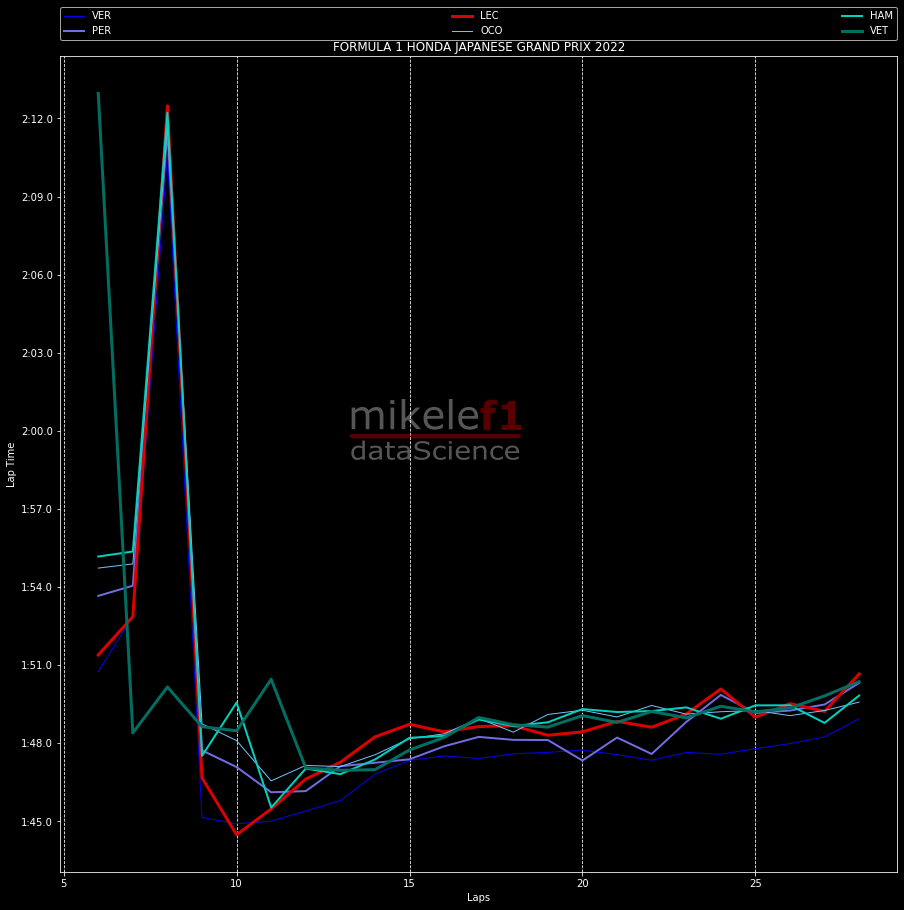

In [46]:
#with cbook.get_sample_data('../fastf1/images/logog.png') as file:
#    im = image.imread(file)

    
im = image.imread('../fastf1/images/logog.png')
    #Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [15, 15]

xx = list_laps[0]['LapNumber']
yy = list_laps[0]['LapTime']
c0 = pd.unique(list_laps[0]['Driver'])
c00 = ff1.plotting.driver_color(c0[0])
xx1 = list_laps[1]['LapNumber']
yy1 = list_laps[1]['LapTime']
c1 = pd.unique(list_laps[1]['Driver'])
c11 = ff1.plotting.driver_color(c1[0])
xx2 = list_laps[2]['LapNumber']
yy2 = list_laps[2]['LapTime']
c2 = pd.unique(list_laps[2]['Driver'])
c22 = ff1.plotting.driver_color(c2[0])
xx3 = list_laps[3]['LapNumber']
yy3 = list_laps[3]['LapTime']
c3 = pd.unique(list_laps[3]['Driver'])
c33 = ff1.plotting.driver_color(c3[0])
xx4 = list_laps[4]['LapNumber']
yy4 = list_laps[4]['LapTime']
c4 = pd.unique(list_laps[4]['Driver'])
c44 = ff1.plotting.driver_color(c4[0])
xx5 = list_laps[5]['LapNumber']
yy5 = list_laps[5]['LapTime']
c5 = pd.unique(list_laps[5]['Driver'])
c55 = ff1.plotting.driver_color(c5[0])

# Etiquetas Verticales | Pilotos
#ax.set_yticks(fastest_laps.index,labels=fastest_laps['Driver'])
ax.set(ylabel='Lap Time', xlabel='Laps')
ax.plot(xx,yy,color=c00, label=c0[0])
ax.plot(xx1,yy1,color=c11, label=c1[0])
ax.plot(xx2,yy2,color=c22, label=c2[0])
ax.plot(xx3,yy3,color=c33, label=c3[0])
ax.plot(xx4,yy4,color=c44, label=c4[0])
ax.plot(xx5,yy5,color=c55, label=c5[0])


ax.get_lines()[0].set_linewidth(1)
ax.get_lines()[1].set_linewidth(2)
ax.get_lines()[2].set_linewidth(3)
ax.get_lines()[3].set_linewidth(1)
ax.get_lines()[4].set_linewidth(2)
ax.get_lines()[5].set_linewidth(3)

#ax.invert_yaxis()
# Etiquetas
ax.set_title(session.event['OfficialEventName'])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=3, mode="expand", borderaxespad=0.)
ax.set_ylabel('Lap Time')
ax.set_xlabel('Laps')
session.event

# Barras
# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)


fig.figimage(im, xo=350, yo=450, zorder=13, alpha=.35)


#Mostrar gráfico
#plt.savefig('2022-13-LFR-6Top.png')
nombrearchivo = str(year)+'-'+str(wknd)+'-LF'+ses+'-'+'6top.png'
plt.savefig(nombrearchivo)
plt.show()

In [45]:
print(ff1.plotting.driver_color('LEC'))

#dc0000


In [21]:
print(c0[0])

LEC
